In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2

c:\Users\samue\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated and will be removed in a future release
  "class": algorithms.Blowfish,


Histogram of Oriented Gradients (HoG)

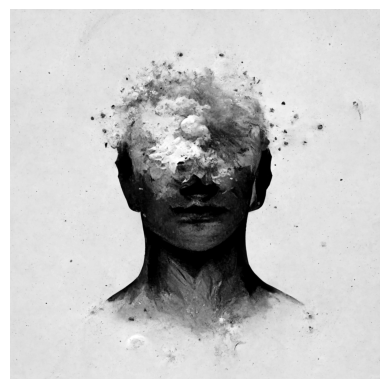

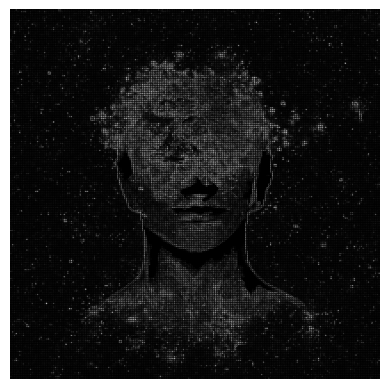

In [3]:
image_path = r"C:\Users\samue\Computer Science\RAI - Computer Vision\Computer Vision\datasets\image1.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.figure()
plt.axis("off")
plt.imshow(image, cmap="gray")
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(hog_image_rescaled, cmap="gray")
plt.show()

Transform (scale and rotatation)

In [4]:
def transform_image(image, angle, scale):
  (h, w) = image.shape[:2]
  center = (w//2, h//2)

  matrix = cv2.getRotationMatrix2D(center, angle, scale)
  transformed = cv2.warpAffine(image, matrix, (w, h))

  return transformed

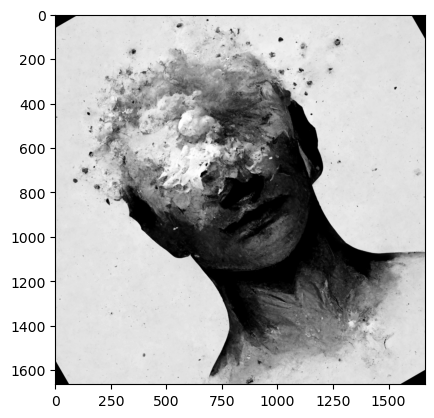

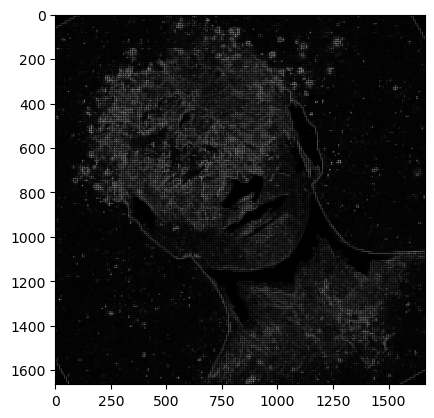

In [5]:
transformed_img = transform_image(image, 30, 1.3)

fd, hog_image = hog(transformed_img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.figure()
plt.imshow(transformed_img, cmap="gray")
plt.show()

plt.figure()
plt.imshow(hog_image_rescaled, cmap="gray")
plt.show()

SIFT

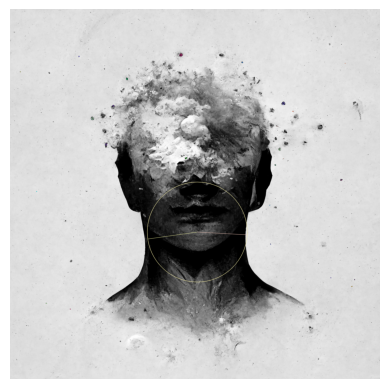

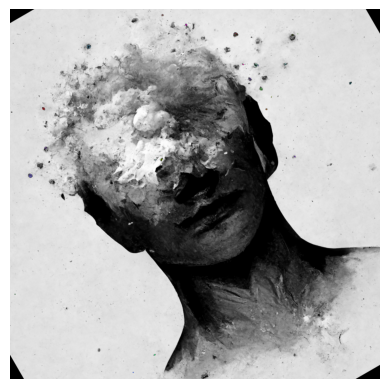

In [6]:
sift = cv2.SIFT_create(nfeatures=50)

image_keypoints, image_descriptors = sift.detectAndCompute(image, None)
image_with_keypoints = cv2.drawKeypoints(image, image_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

transform_image_keypoints, transform_image_descriptors = sift.detectAndCompute(transformed_img, None)
transform_image_with_keypoints = cv2.drawKeypoints(transformed_img, transform_image_keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure()
plt.axis("off")
plt.imshow(image_with_keypoints)
plt.show()

plt.figure()
plt.axis("off")
plt.imshow(transform_image_with_keypoints)
plt.show()

Keypoint matching

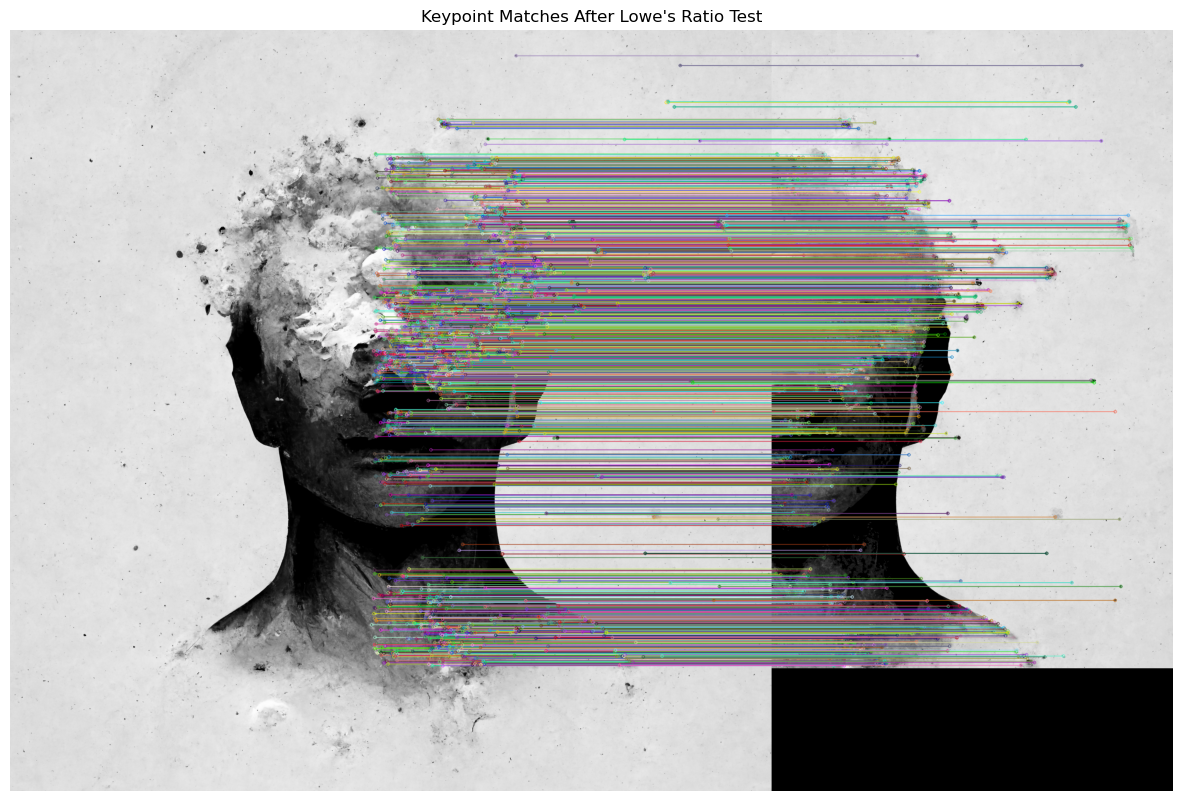

Total Matches Found: 5802
Good Matches After Lowe's Ratio Test: 1929


In [9]:
# Load two images
image1 = cv2.imread(r"C:\Users\samue\Computer Science\RAI - Computer Vision\Computer Vision\datasets\image1.png", cv2.IMREAD_GRAYSCALE)  # Replace with your image
image2 = cv2.imread(r"C:\Users\samue\Computer Science\RAI - Computer Vision\Computer Vision\datasets\image1_cropped.png", cv2.IMREAD_GRAYSCALE)  # Replace with your image

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(image1, None)
kp2, des2 = sift.detectAndCompute(image2, None)

# Brute-Force Matcher with Euclidean distance
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)

# Find the two nearest neighbors for each descriptor
matches = bf.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
  if m.distance < 0.55 * n.distance:
    good_matches.append(m)

results = cv2.drawMatches(image1, kp1, image2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


# Plot the results
plt.figure(figsize=(15, 10))
plt.title("Keypoint Matches After Lowe's Ratio Test")
plt.imshow(results)
plt.axis("off")
plt.show()

print(f"Total Matches Found: {len(matches)}")
print(f"Good Matches After Lowe's Ratio Test: {len(good_matches)}")

SSIM

SSIM (Original vs Compressed): 0.9661
SSIM (Original vs Blurred): 0.8794


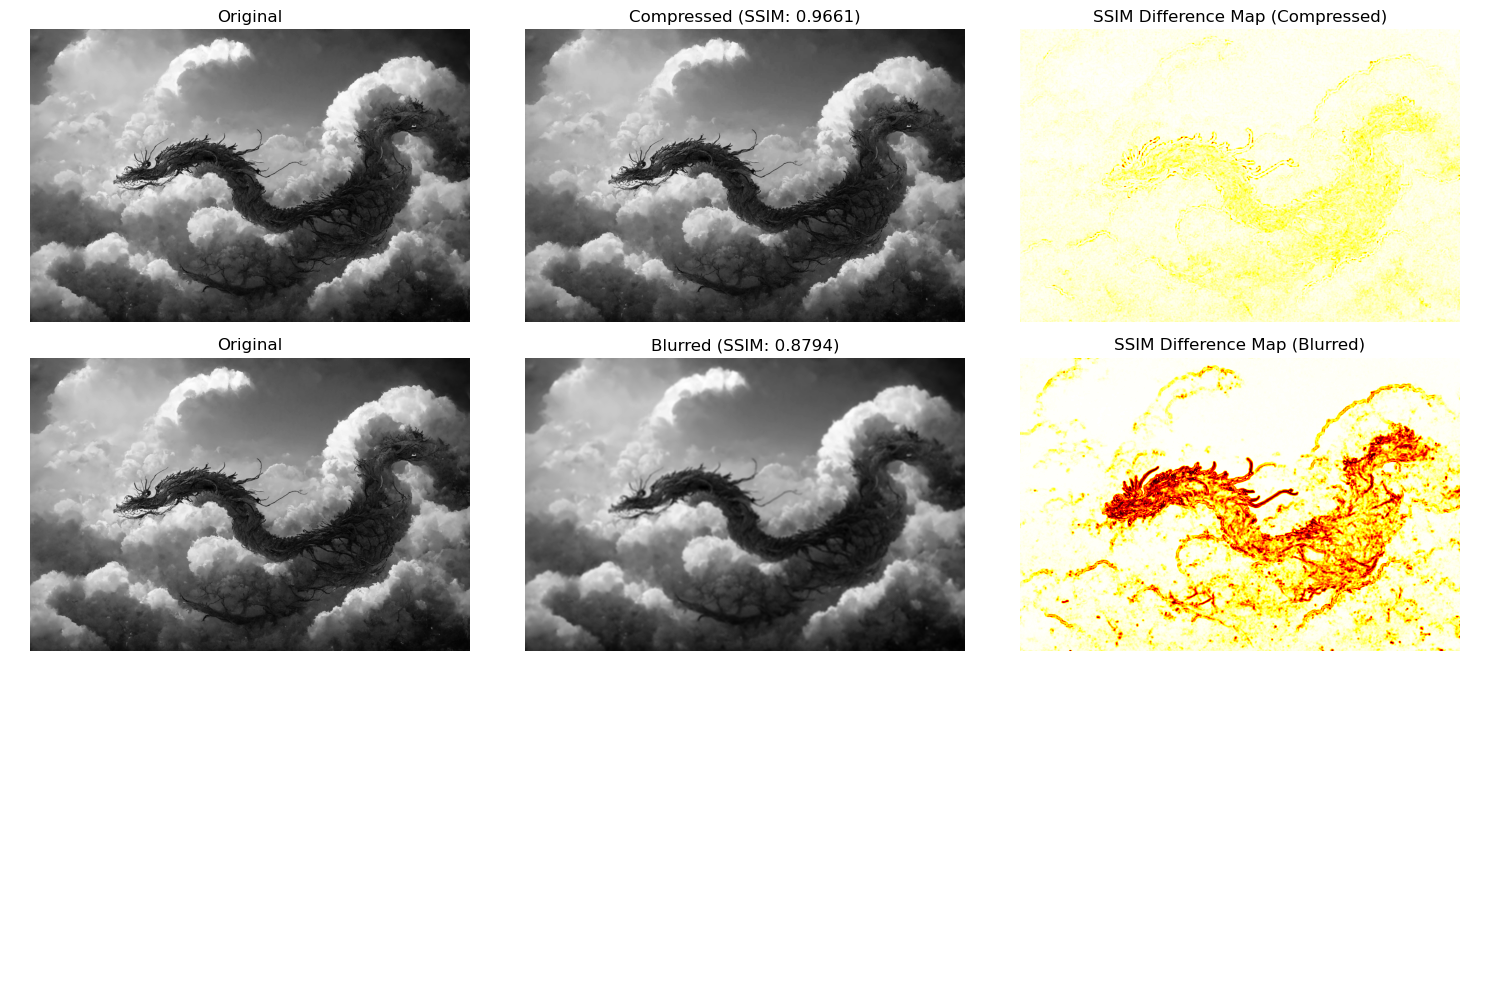

In [11]:
from skimage.metrics import structural_similarity as ssim


# Load an example image
original = cv2.imread(r"C:\Users\samue\Computer Science\RAI - Computer Vision\Computer Vision\datasets\image2.png", cv2.IMREAD_GRAYSCALE)

# Create modified versions of the image
compressed = cv2.imencode('.jpg', original, [int(cv2.IMWRITE_JPEG_QUALITY), 50])[1]  # JPEG compression
compressed = cv2.imdecode(compressed, cv2.IMREAD_GRAYSCALE)

blurred = cv2.GaussianBlur(original, (11, 11), 5)  # Gaussian blur

# Calculate SSIM for compressed and blurred images
ssim_compressed, diff_compressed = ssim(original, compressed, full=True)
ssim_blurred, diff_blurred = ssim(original, blurred, full=True)

# Normalize difference maps to 0-255
diff_compressed = (diff_compressed * 255).astype("uint8")
diff_blurred = (diff_blurred * 255).astype("uint8")

# Print SSIM scores
print(f"SSIM (Original vs Compressed): {ssim_compressed:.4f}")
print(f"SSIM (Original vs Blurred): {ssim_blurred:.4f}")

# Visualize images and difference maps
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes[0, 0].imshow(original, cmap='gray')
axes[0, 0].set_title("Original")
axes[0, 1].imshow(compressed, cmap='gray')
axes[0, 1].set_title(f"Compressed (SSIM: {ssim_compressed:.4f})")
axes[0, 2].imshow(diff_compressed, cmap='hot')
axes[0, 2].set_title("SSIM Difference Map (Compressed)")

axes[1, 0].imshow(original, cmap='gray')
axes[1, 0].set_title("Original")
axes[1, 1].imshow(blurred, cmap='gray')
axes[1, 1].set_title(f"Blurred (SSIM: {ssim_blurred:.4f})")
axes[1, 2].imshow(diff_blurred, cmap='hot')
axes[1, 2].set_title("SSIM Difference Map (Blurred)")

for ax in axes.ravel():
    ax.axis("off")

plt.tight_layout()
plt.show()
